Humza Salman mhs180007

In [2]:
import networkx as nx
import networkx.algorithms.community as nx_comm
from numpy import zeros, dot, array
import pickle
import matplotlib.pyplot as plt
import json
import string
import time
import regex as re

## Section 7.13: Modularity

The first function below calculates modularity for *directed* networks and also returns the maximum modularity value $Q_{\text{max}}$ (NetworkX's modularity function does not report the $Q_{\text{max}}$ value). The second function calculates scalar assortativity (NetworkX's assortativity functions differ from our book definition). 

In [3]:
def modularity(G,c):
    d = dict()
    for k,v in enumerate(c):
        for n in v:
            d[n] = k
    L = 0
    for u,v,data in G.edges.data():
        L += data['weight']
    Q, Qmax = 0,1
    for u in G.nodes():
        for v in G.nodes():
            if d[u] == d[v]:
                Auv = 0
                if G.has_edge(v,u):
                    Auv = G[v][u]['weight']
                Q += ( Auv - G.in_degree(u,weight='weight')*G.out_degree(v,weight='weight')/L )/L
                Qmax -= ( G.in_degree(u,weight='weight')*G.out_degree(v,weight='weight')/L )/L
    return Q, Qmax

def scalar_assortativity(G,d):
    x = zeros(G.number_of_nodes())
    for i,n in enumerate(G.nodes()):
        x[i] = d[n]

    A = array(nx.adjacency_matrix(G).todense().T)
    M = 2*A.sum().sum()
    ki = A.sum(axis=1) #row sum is in-degree
    ko = A.sum(axis=0) #column sum is out-degree
    mu = ( dot(ki,x)+dot(ko,x) )/M

    R, Rmax = 0, 0
    for i in range(G.number_of_nodes()):
        for j in range(G.number_of_nodes()):
             R += ( A[i,j]*(x[i]-mu)*(x[j]-mu) )/M
             Rmax += ( A[i,j]*(x[i]-mu)**2 )/M

    return R, Rmax

In [4]:
G = nx.read_weighted_edgelist('fifa1998.edgelist',create_using=nx.DiGraph)

c = {
    'group1': {'Argentina','Brazil','Chile','Mexico','Colombia','Jamaica','Paraguay'},
    'group2': {'Japan','SouthKorea'},
    'group3': {'UnitedStates'},
    'group4': {'Nigeria','Morocco','SouthAfrica','Cameroon','Tunisia','Iran','Turkey'},
    'group5': {'Scotland','Belgium','Austria','Germany','Denmark','Spain','France','GreatBritain','Greece','Netherlands','Norway','Portugal','Italy','Yugoslavia','Romania','Bulgaria','Croatia','Switzerland'}
    }
Q, Qmax = modularity(G,c.values())
print('FIFA exports by geographic region is assortatively mixed: %1.4f/%1.4f' % (Q,Qmax))

c = {
    'exporters': {'Argentina','Brazil','Chile','Colombia','Mexico','Scotland','Belgium','Austria','Denmark','France','Greece','Netherlands','Portugal','Yugoslavia','Croatia','Jamaica','Cameroon','Nigeria','Morocco','Tunisia'},
    'importers': {'Paraguay','SouthKorea','UnitedStates','SouthAfrica','Iran','Turkey','Germany','Spain','GreatBritain','Norway','Italy','Romania','Bulgaria','Switzerland','Japan'}
    }
Q, Qmax = modularity(G,c.values())
print('FIFA exports by importers/exporters is disassortatively mixed: %1.4f/%1.4f' % (Q,Qmax))

FIFA exports by geographic region is assortatively mixed: 0.1200/0.5505
FIFA exports by importers/exporters is disassortatively mixed: -0.0185/0.5748


In [5]:
print('HIGHLIGHTED QUESTION -  Write a few sentences describing why you see the values you get.')
print('We see that FIFA exports by geogrpahic region is assortatively mixed because players are likely to play within their own geographic region.')
print('We see that FIFA exports by importers/exporters is disassortatively mixed because players are likely to play with other countries rather than their own.')

HIGHLIGHTED QUESTION -  Write a few sentences describing why you see the values you get.
We see that FIFA exports by geogrpahic region is assortatively mixed because players are likely to play within their own geographic region.
We see that FIFA exports by importers/exporters is disassortatively mixed because players are likely to play with other countries rather than their own.


## Section 7.13: Assortativity

In [6]:
gdp = pickle.load(open('gdp.pkl','rb'))
life_expectancy = pickle.load(open('life_expectancy.pkl','rb'))
tariff = pickle.load(open('tariff.pkl','rb'))

G = nx.read_weighted_edgelist('world_trade_2014.edgelist',create_using=nx.DiGraph)

R, Rmax = scalar_assortativity(G,gdp)
print('Assortativity by GDP: %1.4f' % (R/Rmax))
R, Rmax =  scalar_assortativity(G,life_expectancy)
print('Assortativity by life expectancy: %1.4f' % (R/Rmax))
R, Rmax =  scalar_assortativity(G,tariff)
print('Assortativity by tariff: %1.4f' % (R/Rmax))

C:\Users\Humza\AppData\Local\Temp\ipykernel_12512\906063264.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = array(nx.adjacency_matrix(G).todense().T)


Assortativity by GDP: -0.0005
Assortativity by life expectancy: 0.1281


C:\Users\Humza\AppData\Local\Temp\ipykernel_12512\906063264.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = array(nx.adjacency_matrix(G).todense().T)


Assortativity by tariff: 0.1191


In [7]:
print('HIGHLIGHTED QUESTION - Again, write a few sentences to describe what these values tell you about the world trade system and reason why these attributes might be assortative, disassortative, or neither.')
print('Assortativity by GDP is disassortatively mixed which could be because a high GDP country might be connected to multiple other low GDP countries and vice versa. It is very close to 0 (randomly mixed) which tells us that GDP is not the biggest determiner of trade.')
print('Assortativity by life expectancy is assoratatively mixed which could be because countries with higher life expectancy are likely to be more developed and hence want goods and services from each other.')
print('Assortativity by tariff is assortatively mixed which could be because countries may not want high tariffs applied to their trade, so deciding trade based on tariff makes sense to keep prices low')

HIGHLIGHTED QUESTION - Again, write a few sentences to describe what these values tell you about the world trade system and reason why these attributes might be assortative, disassortative, or neither.
Assortativity by GDP is disassortatively mixed which could be because a high GDP country might be connected to multiple other low GDP countries and vice versa. It is very close to 0 (randomly mixed) which tells us that GDP is not the biggest determiner of trade.
Assortativity by life expectancy is assoratatively mixed which could be because countries with higher life expectancy are likely to be more developed and hence want goods and services from each other.
Assortativity by tariff is assortatively mixed which could be because countries may not want high tariffs applied to their trade, so deciding trade based on tariff makes sense to keep prices low


In [8]:
print('HIGHLIGHTED QUESTION -  Do this algebraic activity to show the following simplification')

HIGHLIGHTED QUESTION -  Do this algebraic activity to show the following simplification


!['image'](./simplification_of_assortativity_statistic_R.png)

## Section 11.2 - 11.11 Partitioning & Community Detection

In [9]:
print('HIGHLIGHTED QUESTION - diagram an example in which the cut set size must increase before it decreases to a value smaller than the original.')

HIGHLIGHTED QUESTION - diagram an example in which the cut set size must increase before it decreases to a value smaller than the original.


!['image'](./Kernighan-Lin_algorithm_example.png)

In [10]:
print('HIGHLIGHTED QUESTION - Show that the modularity matrix satisfies the following summation property: ∑j=1:n Bij=0 where Bij=Aij−(kikj)/(2m)')

HIGHLIGHTED QUESTION - Show that the modularity matrix satisfies the following summation property: ∑j=1:n Bij=0 where Bij=Aij−(kikj)/(2m)


!['image'](./modularity_matrix_summation_property.png)

### Community Detection in Practice

In [10]:
print('HIGHLIGHTED QUESTION -  Think through why linking hashtags that co-occur in tweets could give us a way of finding groups of hashtags with similar meanings. Find two tweets in the provided dataset that support this idea. Find one that doesn\'t (and explain why).')

HIGHLIGHTED QUESTION -  Think through why linking hashtags that co-occur in tweets could give us a way of finding groups of hashtags with similar meanings. Find two tweets in the provided dataset that support this idea. Find one that doesn't (and explain why).


In [11]:
print('{"created_at":"Thu Nov 26 21:31:13 +0000 2015","lang":"en","text":"RT @OrganicLiveFood: 37 millions bees found dead in Canada after planting #GMOs treated w #neonicotinoid class of #pesticides https://t.co/…"}')
print('{"created_at":"Thu Nov 26 21:31:13 +0000 2015","lang":"en","text":"bernadine is currently Live Free Chat https://t.co/rl6xP0iJKx #filipina #pinay #philippines https://t.co/pvt1KzcrGn"}')
print('{"created_at":"Thu Nov 26 21:31:14 +0000 2015","lang":"en","text":"Hey @TheMagP1 I want one of those #PiZero but MagPi#40 is out of stock. Cannot live without {it | thing | card | computer | ... }"}')

print()
print('Here we see the first two tweets contain hashtags that are related to each other in terms of topics and similarity, however the third tweet contains #PiZero which references a dish and #40 references a number. So, we see that co-occuring hashtags in a single tweet can be used to identify topics that are related to each other, but that may not always be the case if the hashtags do not contain useful information.')

{"created_at":"Thu Nov 26 21:31:13 +0000 2015","lang":"en","text":"RT @OrganicLiveFood: 37 millions bees found dead in Canada after planting #GMOs treated w #neonicotinoid class of #pesticides https://t.co/…"}
{"created_at":"Thu Nov 26 21:31:13 +0000 2015","lang":"en","text":"bernadine is currently Live Free Chat https://t.co/rl6xP0iJKx #filipina #pinay #philippines https://t.co/pvt1KzcrGn"}
{"created_at":"Thu Nov 26 21:31:14 +0000 2015","lang":"en","text":"Hey @TheMagP1 I want one of those #PiZero but MagPi#40 is out of stock. Cannot live without {it | thing | card | computer | ... }"}

Here we see the first two tweets contain hashtags that are related to each other in terms of topics and similarity, however the third tweet contains #PiZero which references a dish and #40 references a number. So, we see that co-occuring hashtags in a single tweet can be used to identify topics that are related to each other, but that may not always be the case if the hashtags do not contain useful inf

#### 1. Identifying co-occurring hashtags in the data

In [12]:
# ##foggy!Living in Dallas #awesome. -- should output #foggy and #awesome

In [13]:
print('HIGHLIGHTED QUESTION - What does it mean if this file has empty lines?')
print('It means that a specific tweet did not have hashtags used, but in my hashtags_sets.txt file I do not have empty lines because I take care of them in pre-processing before I output.')

HIGHLIGHTED QUESTION - What does it mean if this file has empty lines?
It means that a specific tweet did not have hashtags used, but in my hashtags_sets.txt file I do not have empty lines because I take care of them in pre-processing before I output.


In [14]:
# \p{L} will match all unicode characters 
# \p{N} will match all unicode digits
# [\p{L}\p{N}] will match any character present in this list
# [\p{L}\p{N}]+ will match any character present in this list from one to as many times as it appears
# #([\p{L}\p{N}]+)' will match any character present in unicode characters andor digits at least once and create a grouping around the word so it does not incldue the hashtag when we findall

pattern = r'#([\p{L}\p{N}]+)' 

In [15]:
with open("raw_twitter.json", "r", encoding='utf-8') as f:
    with open('hashtag_sets.txt', 'w', encoding='utf-8') as fout:
        for line in f:
            if not line.strip():
                continue

            data = json.loads(line.strip())
            
            tweet = data['text']
            
            hashtags = re.findall(pattern, tweet)
            
            # hashtag pattern found in tweet
            if len(hashtags) != 0: 
                result = ' '.join(hashtags)
                fout.write(result+'\n')

#### 2. Building a network from the co-occuring hashtags

In [16]:
print('HIGHLIGHTED QUESTION -- How do we interpret this file as a (hypergraph) network? Why don\'t we just analyze the hypergraph? ')
print('We can take each line as a hyperedge between the hashtags present within that line. This wouldn\'t be particulary useful to analyze since hypergraphs can\'t account for weights and also they are confusing.')

HIGHLIGHTED QUESTION -- How do we interpret this file as a (hypergraph) network? Why don't we just analyze the hypergraph? 
We can take each line as a hyperedge between the hashtags present within that line. This wouldn't be particulary useful to analyze since hypergraphs can't account for weights and also they are confusing.


In [17]:
G = nx.Graph()

In [18]:
with open("hashtag_sets.txt", "r", encoding='utf-8') as f:
    hashtags = [line.strip().split() for line in f]
        
            

In [19]:
print(hashtags[0])

['Simone', 'GF14']


In [20]:
hashtags = [[w.lower() for w in tags] for tags in hashtags]

In [21]:
print(hashtags[1])

['podemos']


In [22]:
for tweet in hashtags:
    for tag in tweet:
        G.add_node(tag)

In [23]:
print(G.number_of_nodes())

72379


In [24]:
for tweet in hashtags:
    for i in range(len(tweet)):
        for j in range(i+1, len(tweet)):
            if G.has_edge(tweet[i], tweet[j]):
                G[tweet[i]][tweet[j]]['weight'] += 1
            else:
                G.add_edge(tweet[i], tweet[j], weight=1)

In [25]:
nx.write_weighted_edgelist(G, 'hashtags.edgelist')

In [26]:
print(G.number_of_nodes())
print(G.number_of_edges())

72379
147860


#### 3. Detecting communities in the network

In [27]:
LG = nx.read_weighted_edgelist('hashtags.edgelist',create_using=nx.Graph)

In [28]:
print(LG.number_of_nodes())
print(LG.number_of_edges())

51756
147860


In [29]:
print('I investigated the reason for why the number of nodes is lower but the number of edges remains the same whenever I compare the original graph I created vs the one I loaded in. This happens because write_weighted_edgelist will not account for nodes that have no edges, so they don\'t get written to the file.')

I investigated the reason for why the number of nodes is lower but the number of edges remains the same whenever I compare the original graph I created vs the one I loaded in. This happens because write_weighted_edgelist will not account for nodes that have no edges, so they don't get written to the file.


In [30]:
cset = list(nx_comm.label_propagation_communities(LG))

In [31]:
biggest = 0
for comm in cset:
    if biggest < len(comm):
        biggest = len(comm)
        
print(biggest)

10500


#### 4. Finding the most meaningful communities

In [33]:
def plot_communities(G, weight_threshold=0, component_size_threshold=0):
    
    # accumulate edges to remove
    remove_edges = []
    for u, v, weight in G.edges(data="weight"):
        if weight < weight_threshold: # only consider edges with weights greater than threshold
            remove_edges.append((u, v))
            
    # remove edges        
    G.remove_edges_from(remove_edges)
            
    # get components
    components = list(nx.connected_components(G))
    
    # accumulate nodes in small components
    small_component_nodes = []
    for comp in components:
        if len(comp) < component_size_threshold: # only consider components with size greater than threshold
            for n in comp:
                small_component_nodes.append(n)
    
    # remove nodes from original graph
    G.remove_nodes_from(small_component_nodes)
    
    # label propagation communities
    prop_comm = list(nx_comm.label_propagation_communities(G))
    
    # get sizes of each community
    comm_sizes = [len(i) for i in prop_comm]
    
    # plot histogram of communities
    plt.hist(comm_sizes,20, edgecolor='black', linewidth=1.2)
    plt.xlabel('community sizes')
    plt.ylabel('frequency')
    plt.show()
    
    with open(f'htag_communities_w{weight_threshold}_c{component_size_threshold}.txt', 'w', encoding='utf-8') as fout:
        for comm in prop_comm:
            fout.write(str(comm)+'\n\n')

In [34]:
print('HIGHLIGHTED QUESTION -  What does it mean to ignore low weighted edges (in terms of tweets/hashtags)? As we raise the threshold higher and higher, what does the network represent?')
print('When we ignore low weighted edges, we are essentially saying that certain hashtags that co-occur in tweets at a low frequency should not be considered in our community detection algorithm. As we raise the threshold higher and higher, the network represents only those hashtags that are very popular and occur with each other.')

HIGHLIGHTED QUESTION -  What does it mean to ignore low weighted edges (in terms of tweets/hashtags)? As we raise the threshold higher and higher, what does the network represent?
When we ignore low weighted edges, we are essentially saying that certain hashtags that co-occur in tweets at a low frequency should not be considered in our community detection algorithm. As we raise the threshold higher and higher, the network represents only those hashtags that are very popular and occur with each other.


In [35]:
# read in graph from hashtags edgelist
LG = nx.read_weighted_edgelist('hashtags.edgelist',create_using=nx.Graph)

HIGHLIGHTED QUESTION -  plot a histogram of the distribution in community sizes.


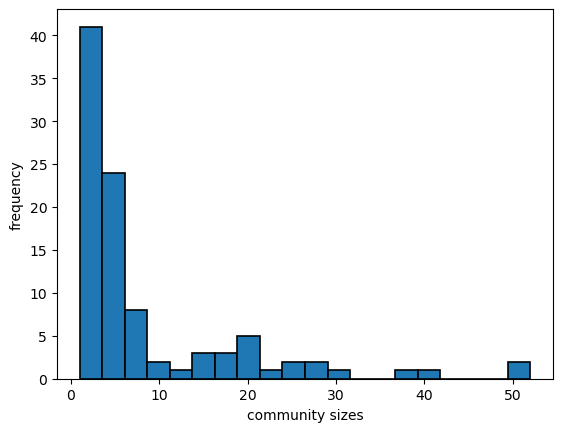

In [37]:
print('HIGHLIGHTED QUESTION -  plot a histogram of the distribution in community sizes.')
plot_communities(LG.copy(), weight_threshold=10, component_size_threshold=10)

In [38]:
print('HIGHLIGHTED QUESTION - Find a community that "makes sense." Interpret the cluster.')
print()
print("Community: {'thankfulselfie', 'blessed', 'uncles', 'gratitude', 'love', 'allaboutlove', 'football', 'teens', 'laquanmcdonald', 'thanks', 'iamthankfulfor', 'turkeyday', 'thankful', 'happythanksgiving', 'family', 'givethanks', 'lgm', 'holiday', 'matwh', 'cool', 'friends', 'thanksgiving', 'grateful', 'soccer', 'me', 'yearinspace', 'ha', 'thanksgiving2015', 'america'}")
print()
print('This community makes sense. Based on the tags it seems to be about thanksgiving and having gratitude for family and friends. It also has references to football and america since which makes sense given it is an american sport and holiday.')

HIGHLIGHTED QUESTION - Find a community that "makes sense." Interpret the cluster.

Community: {'thankfulselfie', 'blessed', 'uncles', 'gratitude', 'love', 'allaboutlove', 'football', 'teens', 'laquanmcdonald', 'thanks', 'iamthankfulfor', 'turkeyday', 'thankful', 'happythanksgiving', 'family', 'givethanks', 'lgm', 'holiday', 'matwh', 'cool', 'friends', 'thanksgiving', 'grateful', 'soccer', 'me', 'yearinspace', 'ha', 'thanksgiving2015', 'america'}

This community makes sense. Based on the tags it seems to be about thanksgiving and having gratitude for family and friends. It also has references to football and america since which makes sense given it is an american sport and holiday.


In [39]:
print("HIGHLIGHTED QUESTION - Find a community that doesn't make sense. Explain why it doesn't make sense.")
print()
print("Community: {'aldubdontgiveuponus', 'bwinmanila', 'ggmy', 'wheelsup'}")
print()
print("So I've gone through the communities and researched them. 'aldubdontgiveuponus' seems to be a phillipine power couple. 'bwimanilla' is a city. However, 'ggmy' means god gave me you which is a song. 'wheelsup' probably means some sort of airplane flight or it could be the private jet charter company. Overall, I'm just confused what is going on because half of it makes sense and the other half does not.")

HIGHLIGHTED QUESTION - Find a community that doesn't make sense. Explain why it doesn't make sense.

Community: {'aldubdontgiveuponus', 'bwinmanila', 'ggmy', 'wheelsup'}

So I've gone through the communities and researched them. 'aldubdontgiveuponus' seems to be a phillipine power couple. 'bwimanilla' is a city. However, 'ggmy' means god gave me you which is a song. 'wheelsup' probably means some sort of airplane flight or it could be the private jet charter company. Overall, I'm just confused what is going on because half of it makes sense and the other half does not.


In [40]:
print("Now explore the relationship of how the quality of the communities relates to the weight threshold you impose and the component size you impose by trying a variety of these values (note the weight threshold and component threshold don't have to be the same). Each time write the communities to a text file and examine the communities you are finding – the ones that make sense and the ones that don't. Use these observations to generalize the advantages and disadvantages of these threshold settings.")

Now explore the relationship of how the quality of the communities relates to the weight threshold you impose and the component size you impose by trying a variety of these values (note the weight threshold and component threshold don't have to be the same). Each time write the communities to a text file and examine the communities you are finding – the ones that make sense and the ones that don't. Use these observations to generalize the advantages and disadvantages of these threshold settings.


Weight Threshold: 1 | Community Threshold: 1


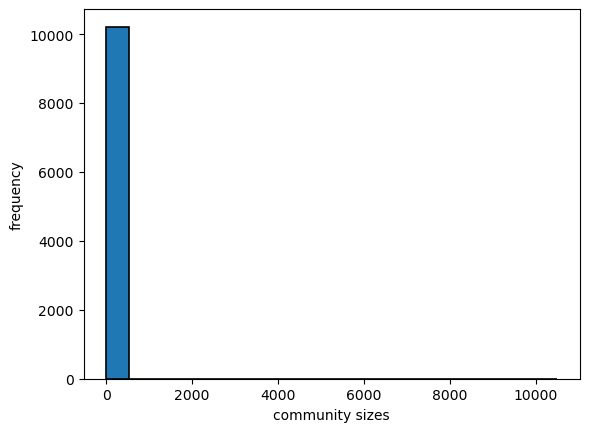

Analysis: It seems that  this creates a lot of communities with relatively smaller sizes (niche interests), and a few communities that have a much larger spectrum of compatibility (broad interests). Overall, this seems to be better for spotting niche interests as those are more easily recognizable.


In [41]:
print('Weight Threshold: 1 | Community Threshold: 1')
plot_communities(LG.copy(), weight_threshold=1, component_size_threshold=1)
print("Analysis: It seems that  this creates a lot of communities with relatively smaller sizes (niche interests), and a few communities that have a much larger spectrum of compatibility (broad interests). Overall, this seems to be better for spotting niche interests as those are more easily recognizable.")

Weight Threshold: 1 | Community Threshold: 15


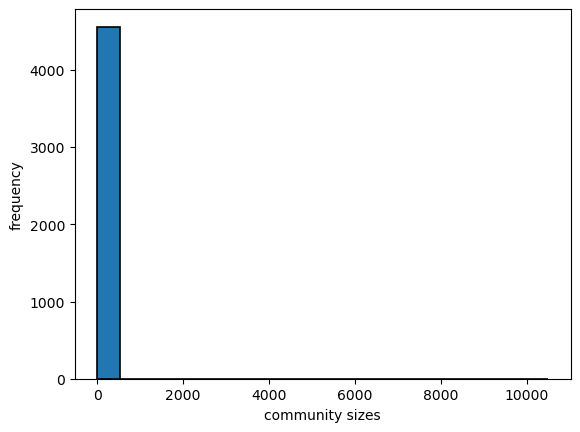

Analysis: This is very similar to low weight and low threshold, however it definitely trims down a lot of communities that fall in the lower size threshold. This could be useful so that we can focus on communities that are more connected with each other.


In [42]:
print('Weight Threshold: 1 | Community Threshold: 15')
plot_communities(LG.copy(), weight_threshold=1, component_size_threshold=15)
print("Analysis: This is very similar to low weight and low threshold, however it definitely trims down a lot of communities that fall in the lower size threshold. This could be useful so that we can focus on communities that are more connected with each other.")

Weight Threshold: 15 | Community Threshold: 1


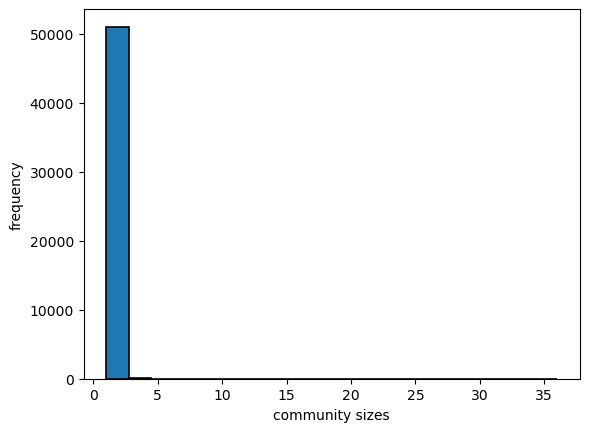

Analysis: This seems to produce communities with either only one hashtag, or a few hashtags combined together. This makes it easier to identify which communities are popular since if the community is large then it is likely it is spoken about more often.


In [43]:
print('Weight Threshold: 15 | Community Threshold: 1')
plot_communities(LG.copy(), weight_threshold=15, component_size_threshold=1)
print("Analysis: This seems to produce communities with either only one hashtag, or a few hashtags combined together. This makes it easier to identify which communities are popular since if the community is large then it is likely it is spoken about more often.")

Weight Threshold: 15 | Community Threshold: 15


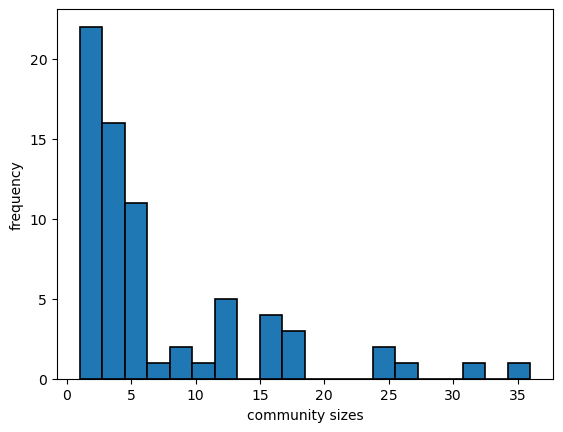

Analysis: This seems to produce communities where the hashtags are related to each other in some way, so it could be useful in identifying categories.


In [44]:
print('Weight Threshold: 15 | Community Threshold: 15')
plot_communities(LG.copy(), weight_threshold=15, component_size_threshold=15)
print("Analysis: This seems to produce communities where the hashtags are related to each other in some way, so it could be useful in identifying categories.")

In [45]:
print(' In your PDF, describe the strengths and weaknesses of each quadrant of the table. Present example communities from each quadrant that support your comments.')

 In your PDF, describe the strengths and weaknesses of each quadrant of the table. Present example communities from each quadrant that support your comments.


In [46]:
print('HIGHLIGHTED QUESTION - Finally, pick a topic/theme that you see in the data. For each threshold, find the communities that seem to correspond best to that topic. Which threshold has communities that best represent that topic? Why? Is there a threshold choice that is clearly the best? Why or why not?')

HIGHLIGHTED QUESTION - Finally, pick a topic/theme that you see in the data. For each threshold, find the communities that seem to correspond best to that topic. Which threshold has communities that best represent that topic? Why? Is there a threshold choice that is clearly the best? Why or why not?


In [47]:
print('Topic: Cooking')
print("Weight Threshold: 1 | Community Threshold: 1 | {'roasted', 'healthyrecipes', 'cleanse', 'taste', 'wildrice', 'grapes', 'entree', 'liquids', 'balsamicvinegar', 'feelinggood', 'salad', 'greens', 'detox'} | {'feastin', 'uwish', 'imgonnagetfat', 'fullplate', 'goodeats', 'goodcookin', 'eatinggood', 'bouttagettheitis'} | {'gustan', 'cupcakes', 'culinary', 'weloverecipes', 'easter', 'everdevega'}")
print()
print("Weight Threshold: 1 | Community Threshold: 15 | {'roasted', 'healthyrecipes', 'cleanse', 'taste', 'wildrice', 'grapes', 'entree', 'liquids', 'balsamicvinegar', 'feelinggood', 'salad', 'greens', 'detox'} | {'gustan', 'cupcakes', 'culinary', 'weloverecipes', 'easter', 'everdevega'} | {'outdoorcooking', 'homemadefood'} | {'homecooking', 'carnetdecuisine', 'diner', 'soiree', 'fairelacuisine', 'bolsa'}")
print()
print("Weight Threshold: 15 | Community Threshold: 1 | {'cooking', 'recipes'} | {'foodrecipes'} | {'cookingskills'} | {'veganrecipehour'}")
print()
print("Weight Threshold: 15 | Community Threshold: 15 | {'cooking', 'recipes'}")
print()
print('Lower weight thresholds seem to produce the best communities that represent the cooking topic. This is likely because of our data not having significant tweets about cooking related activities, so when we have a low weight threshold, those edges do not get cut from our graph. From what I found community thresholds is not a huge influence on the sub-communities formed with cooking. There is no best threshold choice since a low weight treshold paired with either a low or high community threshold produces very similar results. However, having a high weight threshold should be avoided since it produces few communities. Although, high weight threshold and low community threshold produces communities only related to cooking and recipes on a very literal scale. Low weight thresholdpaired with any community threshold also includes things about how people feel about cooking and what ingredients they use, so it offers more variety. Therefore, it could be argued that its a better community since cooking has a lot to do with taste, ingredients, and how it makes us feel. ')

Topic: Cooking
Weight Threshold: 1 | Community Threshold: 1 | {'roasted', 'healthyrecipes', 'cleanse', 'taste', 'wildrice', 'grapes', 'entree', 'liquids', 'balsamicvinegar', 'feelinggood', 'salad', 'greens', 'detox'} | {'feastin', 'uwish', 'imgonnagetfat', 'fullplate', 'goodeats', 'goodcookin', 'eatinggood', 'bouttagettheitis'} | {'gustan', 'cupcakes', 'culinary', 'weloverecipes', 'easter', 'everdevega'}

Weight Threshold: 1 | Community Threshold: 15 | {'roasted', 'healthyrecipes', 'cleanse', 'taste', 'wildrice', 'grapes', 'entree', 'liquids', 'balsamicvinegar', 'feelinggood', 'salad', 'greens', 'detox'} | {'gustan', 'cupcakes', 'culinary', 'weloverecipes', 'easter', 'everdevega'} | {'outdoorcooking', 'homemadefood'} | {'homecooking', 'carnetdecuisine', 'diner', 'soiree', 'fairelacuisine', 'bolsa'}

Weight Threshold: 15 | Community Threshold: 1 | {'cooking', 'recipes'} | {'foodrecipes'} | {'cookingskills'} | {'veganrecipehour'}

Weight Threshold: 15 | Community Threshold: 15 | {'cookin